# FSRQ blackhole mass statistic

In [1]:
import os
import pandas as pd
import numpy as np
from astropy import units as u
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats
from scipy import integrate
from astropy.cosmology import Planck13
from astropy.cosmology import WMAP9 as cosmo

import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.io as pio
pio.renderers.default = 'iframe'


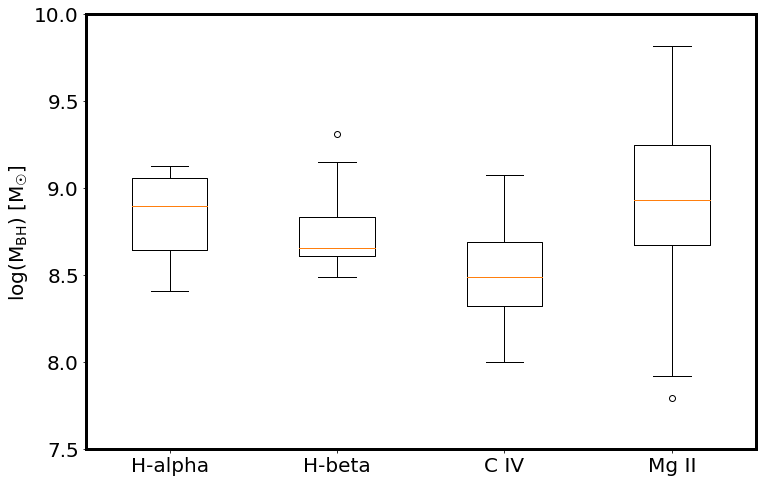

In [2]:
path = "/Users/87steven/Documents/ASIAA/Blazar SED code and data/SDSS EW result/2023_3_23_SDSS source individual EW result"
dir_list = os.listdir(path) 
dir_list.remove('.DS_Store')

Halpha = []
Hbeta = []
CIV = []
MgII = []
SDSS_name = []

for i in range(0, len(dir_list)):   #  len(dir_list)
    
    Table = pd.read_csv(path + '/' + dir_list[i] )
    
    SDSS_name.append( dir_list[i][0:10] )
    
    params_0 = Table['params_0'].values
    params_1 = Table['params_1'].values
    params_2 = Table['params_2'].values
    r_square = Table['r_square'].values
    EW = Table['EW'].values
    L = Table['Luminosity'].values
    M_BH_up = Table['M_BH_up'].values
    M_BH = Table['M_BH'].values
    M_BH_low = Table['M_BH_low'].values
    
    Halpha.append(M_BH[0])
    Hbeta.append(M_BH[1])
    CIV.append(M_BH[2])
    MgII.append(M_BH[3])
    
Halpha = np.array(Halpha)
Hbeta = np.array(Hbeta)
CIV = np.array(CIV)
MgII = np.array(MgII)

MgII[ MgII < 1.0E5] = np.nan

#######################################################################################################
### plot BH mass box plot of 4 emission lines
#######################################################################################################

BH_array = [np.log10(Halpha[ ~np.isnan(Halpha) ]), np.log10(Hbeta[ ~np.isnan(Hbeta) ]), np.log10(CIV[ ~np.isnan(CIV) ]), np.log10(MgII[ ~np.isnan(MgII) ])]

plt.rcParams['figure.figsize'] = [12, 8]   # [15, 7.5]
plt.rcParams['axes.linewidth'] = 3

fig, ax = plt.subplots()
 
ax.boxplot( BH_array, widths = None)

ax.set_xticklabels(['H-alpha', 'H-beta','C IV', 'Mg II'], fontsize = 20)
plt.ylabel('log($\mathrm{M_{BH}}$) [$\mathrm{M_\u2609}$]',  fontsize = 20)
plt.yticks(fontsize = 20)
#plt.yscale('log')

ax.set_ylim (7.5, 10)

#plt.savefig('/Users/87steven/Downloads/fig1.pdf', bbox_inches = 'tight')

#######################################################################################################
### plot BH mass box plot with dimond shape of 4 emission lines
#######################################################################################################
fig = go.Figure()

fig.add_trace(go.Box(y = np.log10(Halpha[ ~np.isnan(Halpha) ]), name = 'H-alpha', marker_color = 'black', fillcolor = 'white', boxmean = 'sd'))

fig.add_trace(go.Box(y = np.log10(Hbeta[ ~np.isnan(Hbeta) ]), name = 'H-beta', marker_color = 'black', fillcolor = 'white', boxmean = 'sd'))

fig.add_trace(go.Box(y = np.log10(CIV[ ~np.isnan(CIV) ]), name = 'C IV', marker_color = 'black', fillcolor = 'white', boxmean = 'sd'))

fig.add_trace(go.Box(y =  np.log10(MgII[ ~np.isnan(MgII) ]), name = 'Mg II', marker_color = 'black', fillcolor = 'white', boxmean = 'sd'))

fig.update_geos(framecolor = 'black', framewidth = 0)

#fig.ylabel('log($\mathrm{M_{BH}}$) [$\mathrm{M_\u2609}$]',  fontsize = 20)

fig.update(layout_yaxis_range = [7.5, 10.5])
fig.update_layout(width = 800, height = 600, font = dict(size = 20), paper_bgcolor = 'rgba(243, 243, 243)', plot_bgcolor = 'rgba(243, 243, 243)', 
                  showlegend = False, yaxis_title = "$\\rm{log(} M_{BH}\\text{)} \ [M_{solor}]$") 

#fig.write_image('/Users/87steven/Downloads/fig1.pdf')


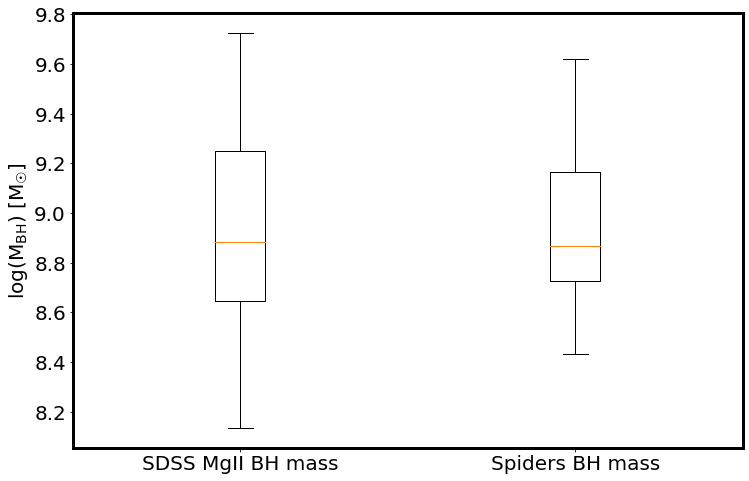

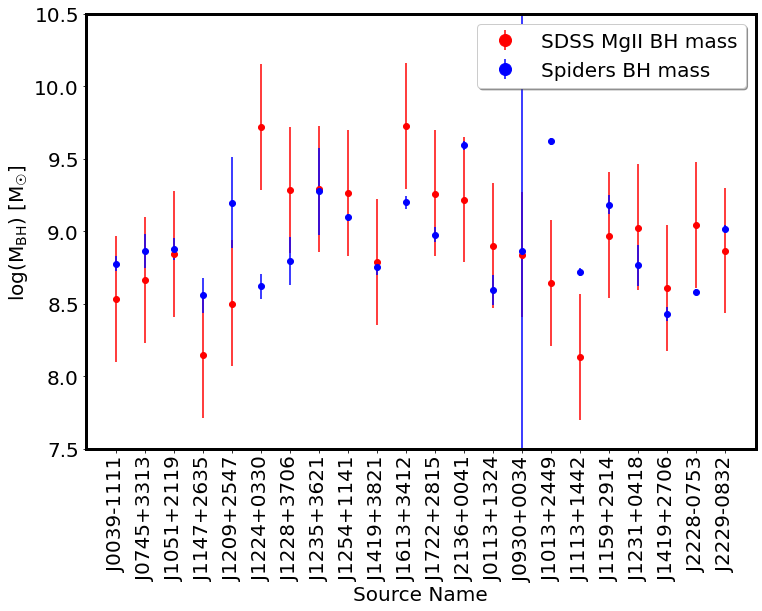

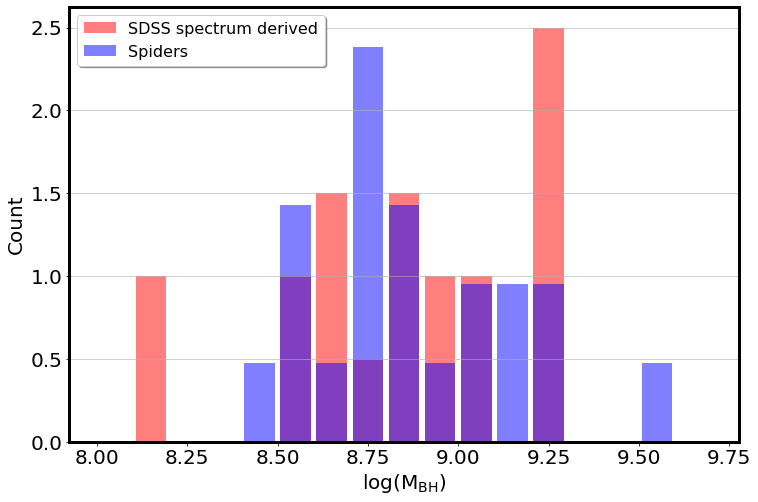

In [11]:
spiders = pd.read_csv('/Users/87steven/Documents/ASIAA/Blazar SED code and data/spiders_quasar BH mass.csv')

spiders_name =  spiders['name'].values
spiders_BH_mass = spiders['logBHMS_mgII'].values
spiders_BH_mass_err = spiders['errlogBHMS_mgII'].values

overlap_index = []
overlap_name = []
overlap_MgII_up = []
overlap_MgII = []
overlap_MgII_low = []

for i in range(0, len(SDSS_name) ):
    if len(np.where(SDSS_name[i] == spiders_name)[0] )>0:
        overlap_index.append(i)
        
        Table = pd.read_csv(path + '/' + SDSS_name[i] +  ' SDSS EW result.csv' )
        
        M_BH_up = Table['M_BH_up'].values
        M_BH = Table['M_BH'].values
        M_BH_low = Table['M_BH_low'].values
        
        overlap_name.append(SDSS_name[i])
        overlap_MgII_up.append(M_BH_up[3])
        overlap_MgII.append(M_BH[3])
        overlap_MgII_low.append(M_BH_low[3])

overlap_MgII_up = np.array(overlap_MgII_up)
overlap_MgII = np.array(overlap_MgII)
overlap_MgII_low = np.array(overlap_MgII_low)

overlap_MgII_up = overlap_MgII_up[( ~np.isnan(overlap_MgII) ) & (spiders_BH_mass != -99)]
overlap_MgII_new = overlap_MgII[( ~np.isnan(overlap_MgII) ) & (spiders_BH_mass != -99)]
overlap_MgII_low = overlap_MgII_low[( ~np.isnan(overlap_MgII) ) & (spiders_BH_mass != -99)]

overlap_MgII_up = np.log10( overlap_MgII_up )
overlap_MgII_new = np.log10( overlap_MgII_new )
overlap_MgII_low = np.log10( overlap_MgII_low )

overlap_MgII_err = np.array(list(zip(0.434*overlap_MgII_low/overlap_MgII_new, 0.434*overlap_MgII_up/overlap_MgII_new))).T

spiders_name = spiders_name[( ~np.isnan(overlap_MgII) ) & (spiders_BH_mass != -99)]
spiders_BH_mass_new = spiders_BH_mass[( ~np.isnan(overlap_MgII) ) & (spiders_BH_mass != -99)]
spiders_BH_mass_err = spiders_BH_mass_err[( ~np.isnan(overlap_MgII) ) & (spiders_BH_mass != -99)]

#######################################################################################################
### plot BH mass box plot
#######################################################################################################
array = [overlap_MgII_new, spiders_BH_mass_new]

plt.rcParams['figure.figsize'] = [12, 8]   # [15, 7.5]
plt.rcParams['axes.linewidth'] = 3

fig, ax = plt.subplots()
 
ax.boxplot(array, widths = None)

ax.set_xticklabels(['SDSS MgII BH mass', 'Spiders BH mass'], fontsize = 20)
plt.ylabel('log($\mathrm{M_{BH}}$) [$\mathrm{M_\u2609}$]',  fontsize = 20)
plt.yticks(fontsize = 20)

plt.savefig('/Users/87steven/Downloads/fig2.pdf', bbox_inches = 'tight')

#######################################################################################################
### plot BH mass scattering plot
#######################################################################################################
plt.rcParams['figure.figsize'] = [12, 8]   # [15, 7.5]
plt.rcParams['axes.linewidth'] = 3

fig, ax = plt.subplots()

x = np.linspace(1, len(overlap_MgII_new), len(overlap_MgII_new))

ax.errorbar(x, overlap_MgII_new, yerr = overlap_MgII_err,fmt = 'o', color = 'red', label = 'SDSS MgII BH mass')
ax.errorbar(x, spiders_BH_mass_new, yerr = spiders_BH_mass_err, 
             fmt = 'o', color = 'blue',  ecolor = "blue", linestyle = '', label = 'Spiders BH mass')

plt.legend(loc = 'upper right', shadow = True, fontsize = 20, markerscale = 2) 

ax.set_ylim (7.5, 10.5)

plt.xlabel('Source Name',  fontsize = 20)
plt.xticks(x, spiders_name, rotation = 'vertical', fontsize = 20)
plt.ylabel('log($\mathrm{M_{BH}}$) [$\mathrm{M_\u2609}$]',  fontsize = 20)
plt.yticks(fontsize = 20)

plt.savefig('/Users/87steven/Downloads/fig3.pdf', bbox_inches = 'tight')

#######################################################################################################
### plot BH mass distribution
#######################################################################################################
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['axes.linewidth'] = 3
    
fig, ax = plt.subplots()

n, bins, p = plt.hist(overlap_MgII_new, bins = np.arange(8, max(overlap_MgII_new), 0.1), density = True,
                                color = 'red', alpha = 0.5, rwidth = 0.85, label = 'SDSS spectrum derived' )

n, bins, p = plt.hist(spiders_BH_mass_new, bins = np.arange(8,max(spiders_BH_mass_new), 0.1), density = True,
                                color = 'blue', alpha = 0.5, rwidth = 0.85, label = 'Spiders' )

plt.grid(axis = 'y', alpha = 0.75)
plt.xlabel('log($\mathrm{M_{BH}}$)', fontsize = 20)
plt.xticks(fontsize = 20)
plt.ylabel('Count',  fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(loc = 'upper left', shadow = True,  fontsize = 16, markerscale = 2) 

#plt.savefig('/Users/87steven/Downloads/fig4.pdf', bbox_inches = 'tight')



In [48]:
#######################################################################################################
### count how many sources have BH mass estimation
#######################################################################################################
path = "/Users/87steven/Documents/ASIAA/Blazar SED code and data/SDSS EW result/2023_3_23_SDSS source individual EW result"
dir_list = os.listdir(path) 
dir_list.remove('.DS_Store')

count = 0

for i in range(0, len(dir_list)):   #  len(dir_list)
    
    Table = pd.read_csv(path + '/' + dir_list[i] )

    M_BH_up = Table['M_BH_up'].values
    M_BH = Table['M_BH'].values
    M_BH_low = Table['M_BH_low'].values
    
    for k in range(0, len(M_BH)):
        if ~np.isnan( M_BH[k] ):
            count = count+1
            break
            

In [127]:
#######################################################################################################
### find the r_suuare, which is cloest to 1, and save BH mass into a csv file
#######################################################################################################
path = "/Users/87steven/Documents/ASIAA/Blazar SED code and data/SDSS EW result/2023_3_23_SDSS source individual EW result"
dir_list = os.listdir(path) 
dir_list.remove('.DS_Store')

def ClearData():
    data = {
    'Name': [],
    'BH_mass_up': [],
    'BH_mass': [],
    'BH_mass_low': []
    }
    return data

SDSS_name = []
M_BH_up_array = []
M_BH_array = []
M_BH_low_array = []
df = ClearData()

def closest(lst):
    return lst[min(range(len(lst)), key = lambda i: abs(lst[i]-1))]

for i in range(0, len(dir_list)):   #  len(dir_list)
    
    Table = pd.read_csv(path + '/' + dir_list[i] )
        
    params_0 = Table['params_0'].values
    params_1 = Table['params_1'].values
    params_2 = Table['params_2'].values
    r_square = Table['r_square'].values
    EW = Table['EW'].values
    L = Table['Luminosity'].values
    M_BH_up = Table['M_BH_up'].values
    M_BH = Table['M_BH'].values
    M_BH_low = Table['M_BH_low'].values
    
    M_BH_up = list(M_BH_up)
    M_BH = list(M_BH)
    M_BH_low = list(M_BH_low)
    
    if len(r_square[~np.isnan(r_square)]) > 0:
        SDSS_name.append( dir_list[i][0:10] )

        index = np.where( r_square ==  closest(r_square[~np.isnan(r_square)]))[0]

        M_BH_up_array.append(M_BH_up[index[0]])
        M_BH_array.append(M_BH[index[0]])
        M_BH_low_array.append(M_BH_low[index[0]])
        
for k in range(0, len(SDSS_name)):
    df['Name'].append(SDSS_name[k])
    df['BH_mass_up'].append(M_BH_up_array[k])
    df['BH_mass'].append(M_BH_array[k])
    df['BH_mass_low'].append(M_BH_low_array[k])
    
CSVfile = f'/Users/87steven/Documents/ASIAA/Blazar SED code and data/SDSS BH mass.csv'   
dff = pd.DataFrame(df)      
dff.to_csv(CSVfile, index = False)

print('======================= File saved successfully =======================')


======================= File saved successfully =======================
